**Marketing Analysis <br> Author: Alex Song <br> Contact: Ksong1@mail.yu.edu**

In [1]:
import numpy as np
import pandas as pd
# read the csv into python 
Facebook = pd.read_csv('https://raw.githubusercontent.com/alexsong77/DAV-5400/master/Facebook.csv')
# check all of data to see if any none values and attributes for each columns 
Facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 26 columns):
AD ID                  5096 non-null int64
Placement ID           5096 non-null int64
Date                   5096 non-null object
Campaign               5096 non-null object
Audience               5096 non-null object
Excluded Audience      5008 non-null object
Audience Type          5096 non-null object
Creative               5096 non-null object
Post Type              5096 non-null object
Gender                 5096 non-null object
Optimization Event     5096 non-null object
Media Spend            5096 non-null float64
Impressions            5096 non-null int64
Clicks                 5096 non-null int64
Likes                  5096 non-null int64
Comments               5096 non-null int64
Shares                 5096 non-null int64
Video Views            2548 non-null float64
Video Views to 25%     2548 non-null float64
Video Views to 50%     2548 non-null float64
Video Views to 7

In [2]:
# read another csv into python 
Site = pd.read_csv('https://raw.githubusercontent.com/alexsong77/DAV-5400/master/Site.csv')
# check all of data to see if any none values and attributes for each columns 
Site.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 3 columns):
Placement ID     5096 non-null int64
Purchases        5096 non-null int64
Total Revenue    5096 non-null int64
dtypes: int64(3)
memory usage: 119.5 KB


In [3]:
# join two tables together
df = pd.merge(Facebook, Site, how='inner')
df.head()


,AD ID,Placement ID,Date,Campaign,Audience,Excluded Audience,Audience Type,Creative,Post Type,Gender,Optimization Event,Media Spend,Impressions,Clicks,Likes,Comments,Shares,Video Views,Video Views to 25%,Video Views to 50%,Video Views to 75%,Video Views to 95%,Video Views to 100%,CPM,CTR,CPC,Purchases,Total Revenue
0,1000281165,2000200268,2/1/2019,Evergreen,Shopping Cart Page,Purchases,Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,15.26,774,12,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,19.72,0.0153,1.27,1,97
1,1000141830,2000200714,2/1/2019,Evergreen,Product Page,"Purchasers, Shopping Cart",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,49.12,2935,37,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,16.74,0.0125,1.33,3,399
2,1000659879,2000200882,2/1/2019,Evergreen,Home Page,"Product Page, Shopping Cart, Purchasers",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,81.37,6183,65,5,3,2,NaN,NaN,NaN,NaN,NaN,NaN,13.16,0.0105,1.25,3,261
3,1000599036,2000201316,2/1/2019,Evergreen,Top Purchasers Lookalike 1%,All Site Visitors,Lookalike,Brand Logo + Generic CTA,Photo,F,Conversion,32.65,2739,24,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,11.92,0.0089,1.36,1,24
4,1000512589,2000202452,2/1/2019,Evergreen,Top Purchasers Lookalike 2%,All Site Visitors,Lookalike,Brand Logo + Generic CTA,Photo,F,Conversion,14.86,1375,12,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,10.81,0.0087,1.24,0,0


## Question Number 1

Total spend for each Campaign as below:

In [5]:
# created another table which only contains columns "Campagin" and "Media Spend"
Campaign_MediaSpend = df.loc[:,['Campaign','Media Spend']]
# group by the column "Campaign"
Group_Campaign = Campaign_MediaSpend.groupby('Campaign').sum()
Group_Campaign.sort_values(by='Media Spend',ascending=False,inplace=True)
Group_Campaign

,Media Spend
Campaign,
Evergreen,113244.01
Valentine's Day Gift Offer,52372.40
Free Shipping,22750.46


The table above shows that the Evergreen campaign has the highest cost in terms of Media Spend.

## Question Number 2

The Cost Per Video View and Cost Per Completion for each creative - Filter by Video Post Type

In [6]:
# created another column called "CPV" which calculated by existing columns "Media Spend" and "Video Views to 100%"
df['CPV'] = (df['Media Spend']/df['Video Views to 100%'])
# checked the table to see if we created the column sucessfully
df.tail()

,AD ID,Placement ID,Date,Campaign,Audience,Excluded Audience,Audience Type,Creative,Post Type,Gender,Optimization Event,Media Spend,Impressions,Clicks,Likes,Comments,Shares,Video Views,Video Views to 25%,Video Views to 50%,Video Views to 75%,Video Views to 95%,Video Views to 100%,CPM,CTR,CPC,Purchases,Total Revenue,CPV
5091,1010880145,2021760290,2/14/2019,Valentine's Day Gift Offer,Frequent In-Store Purchasers,All Site Visitors,Custom Audience,Valentine's Day + Generic CTA,Video,M/F,Click,46.59,7685,86,9,4,2,1366.0,647.0,353.0,213.0,150.0,138.0,6.06,0.0112,0.54,1,16,0.337609
5092,1011934363,2023868726,2/14/2019,Valentine's Day Gift Offer,Interested In: Shopping and Fashion,All Site Visitors,Facebook Interest,Valentine's Day + Generic CTA,Video,M/F,Click,31.45,10602,109,11,5,4,2239.0,927.0,550.0,435.0,333.0,304.0,2.97,0.0102,0.29,1,195,0.103454
5093,1012988581,2025977162,2/14/2019,Valentine's Day Gift Offer,Interested In: High-End Retail,All Site Visitors,Facebook Interest,Valentine's Day + Generic CTA,Video,M/F,Click,32.04,8509,64,7,5,3,1972.0,791.0,471.0,361.0,316.0,278.0,3.77,0.0075,0.50,1,157,0.115252
5094,1014042799,2028085598,2/14/2019,Valentine's Day Gift Offer,Interested In: Competitors,All Site Visitors,Facebook Interest,Valentine's Day + Generic CTA,Video,M/F,Click,38.75,7938,44,7,4,2,1987.0,1045.0,534.0,387.0,343.0,295.0,4.88,0.0056,0.88,1,168,0.131356
5095,1015097017,2030194034,2/14/2019,Valentine's Day Gift Offer,Shopping Cart Page,Purchases,Website Custom Audience,Valentine's Day + Valentine's Day CTA,Video,M/F,Click,95.88,7765,140,6,4,3,2162.0,1064.0,614.0,433.0,351.0,309.0,12.35,0.0180,0.68,6,396,0.310291


In [10]:
# created another table which only contained columns "Creative", "CPC", "CPV", "Post Type"
Creative_cpc_cpv_type = df.loc[:,['Creative','CPC','CPV','Post Type']]
# filter the post type by only showing value "Video"
Type_Video = Creative_cpc_cpv_type[Creative_cpc_cpv_type['Post Type'] == 'Video']
# group by the column creative
Creative_Type_Video = Type_Video.groupby(['Creative']).sum()
Creative_Type_Video.sort_values(by=['CPV','CPC'],ascending=False,inplace=True)
Creative_Type_Video

,CPC,CPV
Creative,,
Brand Logo + Save Now CTA,1130.47,346.348005
Brand Logo + Generic CTA,1222.39,344.958474
Valentine's Day + Generic CTA,163.05,55.965116
Brand Logo + Valentine's Day Messaging CTA,145.06,52.846316
Free Shipping + Free Shipping CTA,31.44,14.086944
Brand Logo + Free Shipping CTA,31.77,13.168853
Valentine's Day + Valentine's Day CTA,11.18,5.756943


Based on video posts, the creative "Brand Logo + Save Now CTA" has the highest cost has the highest cost per view (CPC). On the other hand, the creative "Brand Logo + Generic CTA" has the highest cost per click (CPC).

In [11]:
# filter the post type by only showing value "Video"
Type_Photo = Creative_cpc_cpv_type[Creative_cpc_cpv_type['Post Type'] == 'Photo']
# group by the column creative
Creative_Type_Photo = Type_Photo.groupby(['Creative']).sum()
Creative_Type_Photo.sort_values(by='CPC',ascending=False,inplace=True)
Creative_Type_Photo

,CPC,CPV
Creative,,
Brand Logo + Generic CTA,995.33,0.0
Brand Logo + Save Now CTA,916.04,0.0
Valentine's Day + Generic CTA,129.93,0.0
Brand Logo + Valentine's Day Messaging CTA,117.16,0.0
Brand Logo + Free Shipping CTA,25.57,0.0
Free Shipping + Free Shipping CTA,25.27,0.0
Valentine's Day + Valentine's Day CTA,9.68,0.0


For photos, the creative "Brand Logo + Generic CTA" has the highest Cost Per Click (CPC).

## Question Number 3

Create a table that shows Spend, CPM, CTR and CPC for each creative.

In [13]:
# created a table that only contains columns "Creative", "Media Spend", "CPM", "CTR", and "CPC"
MediaSpend_CPM_CTR_CPC = df.loc[:,['Creative','Media Spend','CPM','CTR','CPC']]
# group by the column creative 
Creative_MediaSpend_CPM_CTR_CPC = MediaSpend_CPM_CTR_CPC.groupby('Creative').sum()
Creative_MediaSpend_CPM_CTR_CPC

,Media Spend,CPM,CTR,CPC
Creative,,,,
Brand Logo + Free Shipping CTA,9349.39,736.02,0.7316,57.34
Brand Logo + Generic CTA,54924.38,19080.37,19.6009,2217.72
Brand Logo + Save Now CTA,58319.63,19168.11,21.4515,2046.51
Brand Logo + Valentine's Day Messaging CTA,23331.03,2974.93,3.9542,262.22
Free Shipping + Free Shipping CTA,13401.07,735.89,0.7418,56.71
Valentine's Day + Generic CTA,27204.47,3098.21,3.7620,292.98
Valentine's Day + Valentine's Day CTA,1836.90,386.90,0.4749,20.86


## Question Number 4

Find out the ROAS of each Audience Type 

In [14]:
# created another columns by calculating the existing columns "Total Revenue" and "Media Spend"
df['ROAS'] = (df['Total Revenue']/df['Media Spend'])
# checked the table to see if we created the column successfully
df.head()

,AD ID,Placement ID,Date,Campaign,Audience,Excluded Audience,Audience Type,Creative,Post Type,Gender,Optimization Event,Media Spend,Impressions,Clicks,Likes,Comments,Shares,Video Views,Video Views to 25%,Video Views to 50%,Video Views to 75%,Video Views to 95%,Video Views to 100%,CPM,CTR,CPC,Purchases,Total Revenue,CPV,ROAS
0,1000281165,2000200268,2/1/2019,Evergreen,Shopping Cart Page,Purchases,Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,15.26,774,12,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,19.72,0.0153,1.27,1,97,NaN,6.356488
1,1000141830,2000200714,2/1/2019,Evergreen,Product Page,"Purchasers, Shopping Cart",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,49.12,2935,37,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,16.74,0.0125,1.33,3,399,NaN,8.122964
2,1000659879,2000200882,2/1/2019,Evergreen,Home Page,"Product Page, Shopping Cart, Purchasers",Website Custom Audience,Brand Logo + Generic CTA,Photo,F,Conversion,81.37,6183,65,5,3,2,NaN,NaN,NaN,NaN,NaN,NaN,13.16,0.0105,1.25,3,261,NaN,3.207570
3,1000599036,2000201316,2/1/2019,Evergreen,Top Purchasers Lookalike 1%,All Site Visitors,Lookalike,Brand Logo + Generic CTA,Photo,F,Conversion,32.65,2739,24,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,11.92,0.0089,1.36,1,24,NaN,0.735069
4,1000512589,2000202452,2/1/2019,Evergreen,Top Purchasers Lookalike 2%,All Site Visitors,Lookalike,Brand Logo + Generic CTA,Photo,F,Conversion,14.86,1375,12,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,10.81,0.0087,1.24,0,0,NaN,0.000000


In [16]:
# created another table that only contains columns "Audience Type" and "ROAS"
AudienceType_ROAS = df.loc[:,['Audience Type','Media Spend', 'Total Revenue']]
# check the created table
AudienceType_ROAS.head()

,Audience Type,Media Spend,Total Revenue
0,Website Custom Audience,15.26,97
1,Website Custom Audience,49.12,399
2,Website Custom Audience,81.37,261
3,Lookalike,32.65,24
4,Lookalike,14.86,0


In [19]:
# group by the column "Audience Type" to show the ROAS under each Audience Type
Group_AudienceType = AudienceType_ROAS.groupby(['Audience Type']).sum()
Group_AudienceType 

,Media Spend,Total Revenue
Audience Type,,
Custom Audience,23677.90,86683
Facebook Interest,24833.80,39754
Lookalike,43794.21,120633
Website Custom Audience,96060.96,524129


In [22]:
Group_AudienceType['ROAS'] = Group_AudienceType['Total Revenue']/Group_AudienceType['Media Spend']
Group_AudienceType

,Media Spend,Total Revenue,ROAS
Audience Type,,,
Custom Audience,23677.90,86683,3.660924
Facebook Interest,24833.80,39754,1.600802
Lookalike,43794.21,120633,2.754542
Website Custom Audience,96060.96,524129,5.456212


## Question Number 5
Each Audience Type created based on column Audience <br>

**Custom Audience**: Lapsed Purchasers and Frequent In-Store Purchasers <br>
**Facebook Interest**: Interested In: Competitors, Interested In: High-End Retail, and Interested In: Shopping and Fashion <br>
**Lookalike**: Top Purchasers Lookalike 1% and Top Purchasers Lookalike 2% <br>
**Website Custom Audience**: Home Page, Product Page and Shopping Cart Page <br>


In [23]:
# created a table that only contains columns "Audience Type", "Audience", "CTR", and "ROAS"
Audience_Analysis = df.loc[:,['Audience Type','Audience','CTR','ROAS']]
# group by the column creative 
Audience_Analysis_Summary= Audience_Analysis.groupby('Audience Type').mean()
Audience_Analysis_Summary

,CTR,ROAS
Audience Type,,
Custom Audience,0.010049,2.913341
Facebook Interest,0.007153,1.115867
Lookalike,0.009157,2.328606
Website Custom Audience,0.013810,4.877828


In [24]:
# created a table that filter the audiece type "Website Custom Audience" and group by to calculate the average for CTR
Website_Custom_Audience = Audience_Analysis[Audience_Analysis['Audience Type'] == 'Website Custom Audience']
Website_Custom_Audience_Group = Website_Custom_Audience.groupby(['Audience'])
Website_Custom_Audience_CTR = Website_Custom_Audience_Group['CTR'].describe()['mean']
print(Website_Custom_Audience_CTR)

Audience
Home Page             0.011023
Product Page          0.013906
Shopping Cart Page    0.016329
Name: mean, dtype: float64


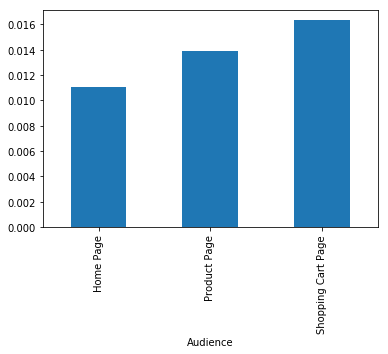

In [25]:
# plot it in a bar chart to see which audience has the highest CTR
barWebsite_Custom_Audience_CTR = Website_Custom_Audience_CTR.plot.bar()
barWebsite_Custom_Audience_CTR;

In [26]:
# created a table that filter the audiece type "Website Custom Audience" and group by to calculate the average for ROAS
Website_Custom_Audience_ROAS = Website_Custom_Audience_Group['ROAS'].describe()['mean']
print(Website_Custom_Audience_ROAS)

Audience
Home Page             3.536379
Product Page          4.747948
Shopping Cart Page    6.255738
Name: mean, dtype: float64


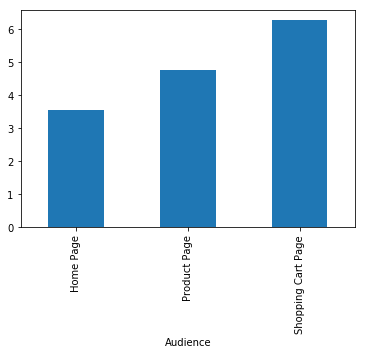

In [27]:
# plot it in a bar chart to see which audience has the highest CTR
barWebsite_Custom_Audience_ROAS = Website_Custom_Audience_ROAS.plot.bar()
barWebsite_Custom_Audience_ROAS;

# conclusion: <br>
Based on my observations, Audience Type: Website Custom Audience has the highest performance based on the major metrics "CTR" and "ROAS". Then, I dig deep to see which audience from "Website Custom Audience" type has the highest performance under each metrics "CTR" and "ROAS". Therefore, both bar charts showed the audience "Shipping Cart Page" has the highest performance. Instead, the audience "Home Page" has the worst performance.

## Question Number 6

A chart that shows daily ROAS performance as below:

In [57]:
# created another table that only contains "Date" and "ROAS" and converted into frame 
Date_ROAS = df.loc[:,['Date','Media Spend', 'Total Revenue']]
Group_Date_ROAS = Date_ROAS.groupby(['Date'])['Media Spend','Total Revenue'].sum()
Group_Date_ROAS['ROAS'] = Group_Date_ROAS['Total Revenue']/Group_Date_ROAS['Media Spend']
# created datetime index 
Group_Date_ROAS.index = pd.to_datetime(Group_Date_ROAS.index)
Group_Date_ROAS.head()
# sorted the new table 

Group_Date_ROAS_New = Group_Date_ROAS.loc[:,['ROAS']]
Group_Date_ROAS_New

,ROAS
Date,
2019-02-01,2.467998
2019-02-10,3.242833
2019-02-11,4.388453
2019-02-12,4.078993
2019-02-13,4.312247
2019-02-14,3.894487
2019-02-15,3.917446
2019-02-16,5.888004
2019-02-17,3.853759


In [0]:
# converted the column "Date" from objective to numeric 
Group_Date_ROAS_New = Group_Date_ROAS_New.sort_index()

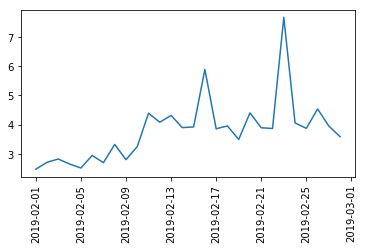

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
# created the line chart to visulize the time series ROAS performance 
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.plot(Group_Date_ROAS_New)

## Question Number 7

A chart that shows CPC and CTR performance by the audience as below:

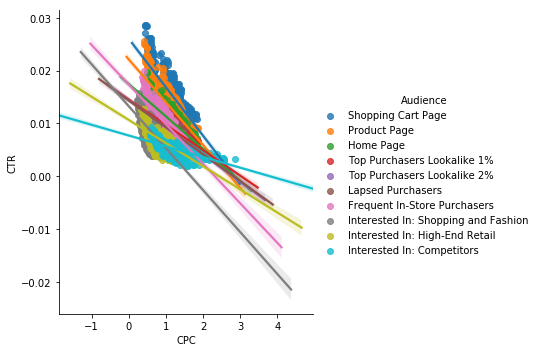

In [63]:
# created the scatter plot to visualize the relationship between CTR and CPC under the category "Audience"
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x="CPC", y="CTR", hue="Audience", data=df);

Based on this chart, we can clearly see the Audience "Shopping Cart Page" has the strongest negative relationship under the metrics "CTR" and "CPC". On the other hand, the Audience "Interested in: Competitors" has the weakest negative relationship under the metrics "CTR" and "CPC".

## Question Number 8

Scatterplot chart as below: showed Daily Spend correlate to ROAS generated

In [64]:
# checked the correlation between column "Media Spend" and "ROAS"
corr_df = df.loc[:,['Media Spend', 'ROAS']]
corr_df.corr()

,Media Spend,ROAS
Media Spend,1.000000,0.298086
ROAS,0.298086,1.000000


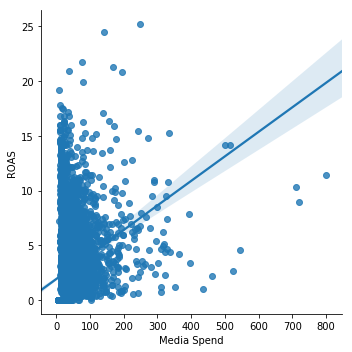

In [65]:
# created the scatterplot to visualize the relationship 
sns.lmplot(x="Media Spend", y="ROAS", data=df);

Amount of Daily Spend does correlate to ROAS generated. They don't have a strong positive relationship. Based on the chart, we can see they do have a strong positive relationship at the beginning (especially on media spend range 0 - 200), but once over the 400, it tended to have a weak positive relationship

## Question Number 9

The metric "CTR" from question 3 I would use to determine which creative performed best. Compared to another two metrics "CPM" and "CPC", which are mainly focusing on cost for impressions and clicks, it won't give us any results about which Creatives have made returns based on its activities. The "CTR" metric showed us how does each Creative actually attracted the user's attention and made clicks. <br>

Creative "Brand Logo + Save Now CTA" performed better under metric "CTR" 

## Question Number 10




In [66]:
# created the table that only contains column "Creative", "Imporessions", "Likes", "Comments", "Shares" group by the column "Creative"
New_Metrics = df.loc[:,['Creative','Impressions','Clicks','Likes','Comments','Shares']]
New_Metrics_Table = New_Metrics.groupby('Creative').sum()
New_Metrics_Table

,Impressions,Clicks,Likes,Comments,Shares
Creative,,,,,
Brand Logo + Free Shipping CTA,730310,8835,728,357,223
Brand Logo + Generic CTA,6194004,57452,6173,3193,1907
Brand Logo + Save Now CTA,6580247,66642,6585,3338,1996
Brand Logo + Valentine's Day Messaging CTA,2589284,31976,2597,1269,774
Free Shipping + Free Shipping CTA,1046281,13012,1026,534,302
Valentine's Day + Generic CTA,2977905,34019,2930,1511,890
Valentine's Day + Valentine's Day CTA,121948,2412,119,59,39


I would also consider metrics such as "Impressions", "Clicks", "Likes", "Comments", "Shares", "Video Views" to analyze the most effective creative tactic. Based on this summary table, we can observe Creative "Brand Logo + Save Now CTA" are highest among all metrics <br>

I would get mean for all of metrics and determine how far away for each Creative to determine the effectiveness or assign grade A, B, C, D for each Creative

## Question Number 11

In order to create a strategy to optimize a campaign, we need to determine first which campaign has the highest return on ad spend.

In [67]:
# group by the column Campaign to check the Media Spend and Total Revenue 
campaign_df = df.groupby('Campaign')['Media Spend','Total Revenue'].sum()
campaign_df

,Media Spend,Total Revenue
Campaign,,
Evergreen,113244.01,366079
Free Shipping,22750.46,166205
Valentine's Day Gift Offer,52372.40,238915


In [68]:
# checked the ROAS under each Campaign
campaign_df['ROAS'] = campaign_df['Total Revenue']/campaign_df['Media Spend']
campaign_df

,Media Spend,Total Revenue,ROAS
Campaign,,,
Evergreen,113244.01,366079,3.232657
Free Shipping,22750.46,166205,7.305567
Valentine's Day Gift Offer,52372.40,238915,4.561849


In [69]:
#counts number of days each campaign ran
unique_date_campaign = df.groupby('Campaign')['Date'].nunique().to_frame('Num Days') 
unique_date_campaign

,Num Days
Campaign,
Evergreen,28
Free Shipping,2
Valentine's Day Gift Offer,4


In [70]:
# merge the days table into the Campaign group by table 
merge_campaign_date = pd.merge(campaign_df, unique_date_campaign, how='inner',on='Campaign')
merge_campaign_date

,Media Spend,Total Revenue,ROAS,Num Days
Campaign,,,,
Evergreen,113244.01,366079,3.232657,28
Free Shipping,22750.46,166205,7.305567,2
Valentine's Day Gift Offer,52372.40,238915,4.561849,4


To be able to decide on the effectivity of each campaign, we need to find the length of days each campaign ran. This is shown by the table above. By doing this, we are able to find out the average daily media spend, total revenue, and ROAS for each campaign.

In [71]:
# calculated the average media spend 
merge_campaign_date['Ave Media Spend'] = merge_campaign_date['Media Spend']/merge_campaign_date['Num Days']
merge_campaign_date

,Media Spend,Total Revenue,ROAS,Num Days,Ave Media Spend
Campaign,,,,,
Evergreen,113244.01,366079,3.232657,28,4044.428929
Free Shipping,22750.46,166205,7.305567,2,11375.230000
Valentine's Day Gift Offer,52372.40,238915,4.561849,4,13093.100000


In [72]:
# calculated the average total revenue 
merge_campaign_date['Ave Total Revenue'] = merge_campaign_date['Total Revenue']/merge_campaign_date['Num Days']
merge_campaign_date

,Media Spend,Total Revenue,ROAS,Num Days,Ave Media Spend,Ave Total Revenue
Campaign,,,,,,
Evergreen,113244.01,366079,3.232657,28,4044.428929,13074.25
Free Shipping,22750.46,166205,7.305567,2,11375.230000,83102.50
Valentine's Day Gift Offer,52372.40,238915,4.561849,4,13093.100000,59728.75


In [73]:
# calculated the average ROAS 
merge_campaign_date['Ave ROAS'] = merge_campaign_date['ROAS']/merge_campaign_date['Num Days']
merge_campaign_date

,Media Spend,Total Revenue,ROAS,Num Days,Ave Media Spend,Ave Total Revenue,Ave ROAS
Campaign,,,,,,,
Evergreen,113244.01,366079,3.232657,28,4044.428929,13074.25,0.115452
Free Shipping,22750.46,166205,7.305567,2,11375.230000,83102.50,3.652783
Valentine's Day Gift Offer,52372.40,238915,4.561849,4,13093.100000,59728.75,1.140462


By looking at the table above, we are able to confirm that the **Free Shipping** campaign has the highest ROAS on a daily basis. This means that this campaign was also the most effective among the three. In order to optimize the revenue, it is therefore recommended to increase the number of days that the **Free Shipping** ran. In addition to this, the company may also just either completely take out the Evergreen campaign since it has the lowest daily average in terms of ROAS or use the cost of this campaign to increase the length of days the Free Shipping or even the Valentine's Day Gift Offer campaign ran.

## Question Number 12



In [74]:
# created the table that only contains column "Video Views to 25%", "Video Views to 50%", "Video Views to 75%", "Video Views to 95%", "Video Views to 100%" group by the column "Campaign"
Test_Metrics = df.loc[:,['Campaign','Video Views to 25%','Video Views to 50%','Video Views to 75%','Video Views to 95%','Video Views to 100%']]
Test_Metrics_Campaign = Test_Metrics.groupby(by='Campaign',as_index=False).mean()
Test_Metrics_Campaign


,Campaign,Video Views to 25%,Video Views to 50%,Video Views to 75%,Video Views to 95%,Video Views to 100%
0,Evergreen,408.208256,204.915584,143.184137,114.793599,103.256030
1,Free Shipping,2111.375000,1044.928571,723.214286,573.339286,516.428571
2,Valentine's Day Gift Offer,1177.220238,595.178571,413.627976,329.883929,297.467262


In [75]:
# changed the table format from wide to long 
l_testmetrics = Test_Metrics_Campaign.melt(id_vars=['Campaign'], value_vars=['Video Views to 25%', 'Video Views to 50%', 
                                                                            'Video Views to 75%', 'Video Views to 95%', 
                                                                            'Video Views to 100%'])
l_testmetrics

,Campaign,variable,value
0,Evergreen,Video Views to 25%,408.208256
1,Free Shipping,Video Views to 25%,2111.375000
2,Valentine's Day Gift Offer,Video Views to 25%,1177.220238
3,Evergreen,Video Views to 50%,204.915584
4,Free Shipping,Video Views to 50%,1044.928571
5,Valentine's Day Gift Offer,Video Views to 50%,595.178571
6,Evergreen,Video Views to 75%,143.184137
7,Free Shipping,Video Views to 75%,723.214286
8,Valentine's Day Gift Offer,Video Views to 75%,413.627976
9,Evergreen,Video Views to 95%,114.793599


In [76]:
# renamed the table 
l_testmetrics.rename(columns={'variable':'Video Views', 'value':'Views Count'},inplace=True)
l_testmetrics.head()

,Campaign,Video Views,Views Count
0,Evergreen,Video Views to 25%,408.208256
1,Free Shipping,Video Views to 25%,2111.375000
2,Valentine's Day Gift Offer,Video Views to 25%,1177.220238
3,Evergreen,Video Views to 50%,204.915584
4,Free Shipping,Video Views to 50%,1044.928571


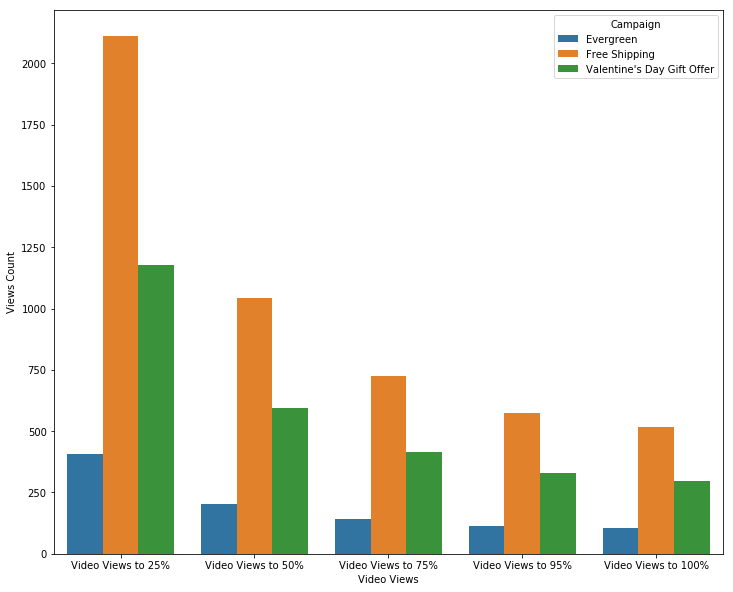

In [77]:
# plot it into a bar chart
plt.figure(figsize=(12,10))
sns.barplot(x='Video Views',y='Views Count',hue='Campaign',data=l_testmetrics);

The number of times your video was viewed to different levels of its length could be another major metric to help identify which campaign is successful. Based on my observation, the Campaign "Free Shipping" has the highest number of times viewed, so the marketing people can spend more efforts on improving the quality of the video or implementing the ads by specifically focusing on "Free Shipping" campaign.